# Credit Card Fraud Detection

In this Jupyter Notebook, I will explore a dataset related to credit card transactions and aim to detect fraudulent transactions using a machine learning model. The dataset contains several columns providing information about the transactions, including various anonymized features, the transaction amount, and a label indicating whether the transaction is fraudulent.

**Columns description:**

1. Time: The time elapsed since the first transaction in the dataset (in seconds).

2. V1 to V28: Anonymized features resulting from a PCA transformation applied to the original transaction data.

3. Amount: The transaction amount.

4. Class: The label for fraud detection where 0 indicates a legitimate transaction and 1 indicates a fraudulent transaction.

The goal of this project is to build a machine learning model that can accurately detect fraudulent transactions based on the given features. This will help financial institutions and credit card companies minimize losses due to fraud and improve the security of their services.

## 1: Data Loading & Exploration

In [1]:
import sklearn
print(sklearn.__version__)

1.5.1


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#I will use sklearn for building Logistic regression model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


**Supress Warnings**

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
credit_df = pd.read_csv(r"C:\Users\User pc\OneDrive\Documents\2023 DATA SCIENCE BOOTCAMP\CodSoft Internship\Credit Card Fraud Detection\creditcard.csv")

#Create a copy
credit_fraud_df = credit_df.copy()

In [5]:
# Display the first few rows of the dataset
credit_fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_fraud_df.shape

(284807, 31)

In [7]:
credit_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
credit_fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


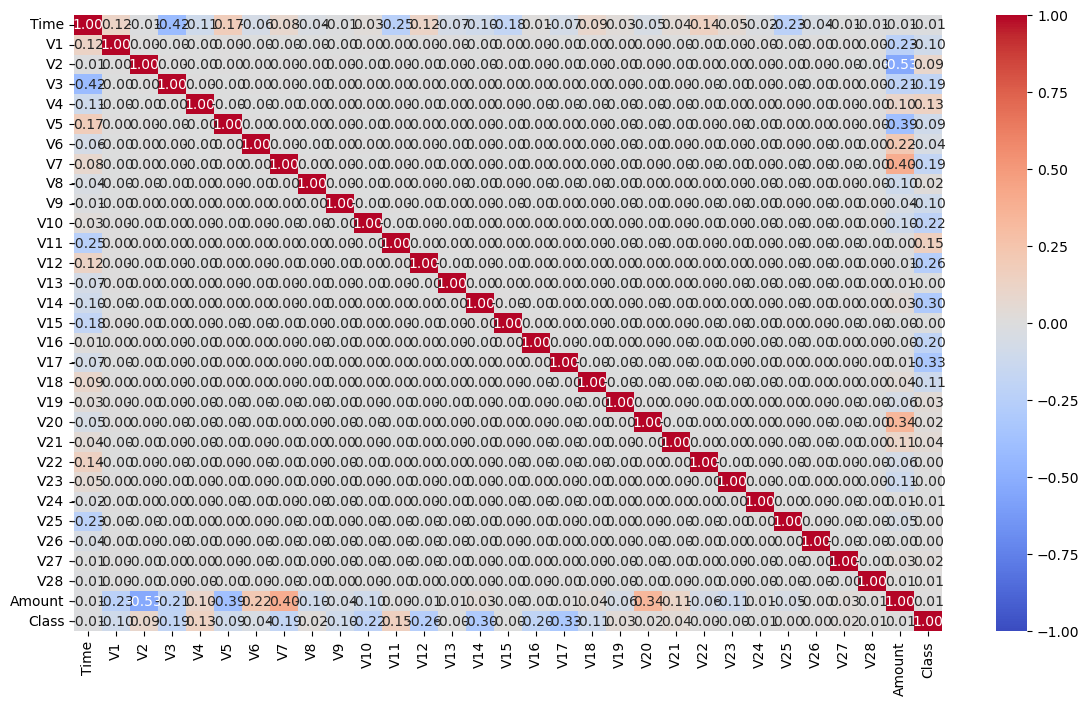

In [9]:
correlation_matrix = credit_fraud_df.corr()

plt.figure(figsize=(14, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()

## 2. Data Preprocessing

In [10]:
# Check for missing values
print(credit_fraud_df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
# Standardize the features 'Time' and 'Amount'
scaler = StandardScaler()
credit_fraud_df['Amount'] = scaler.fit_transform(credit_fraud_df['Amount'].values.reshape(-1, 1))
credit_fraud_df['Time'] = scaler.fit_transform(credit_fraud_df['Time'].values.reshape(-1, 1))


In [12]:
# Split the data into features and target
X = credit_fraud_df.drop(columns=['Class'])
y = credit_fraud_df['Class']


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

## 3. Model Training

In [15]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

LogisticRegression()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9745795442575752
Confusion Matrix:
 [[55423  1441]
 [    7    91]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



## 4. Model Evaluation

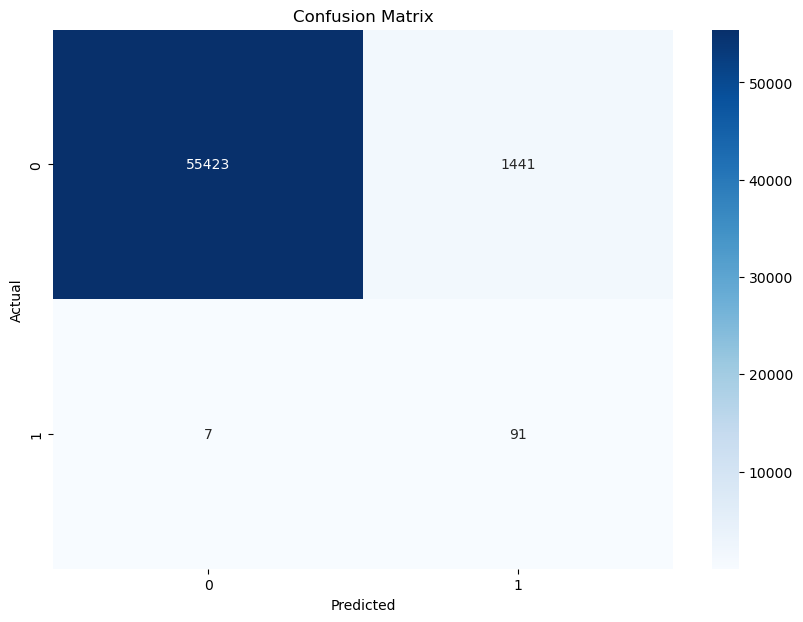

In [18]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 5. Conclusion of the Credit Card Fraud Detection Model

Credit card fraud detection is the process of identifying and preventing fraudulent activities in credit card transactions. Due to the widespread use of credit cards, both in-person and online, detecting fraudulent transactions has become crucial to protect consumers and financial institutions from significant losses.


The dataset commonly used for credit card fraud detection includes transaction details such as the transaction amount, time of transaction, and anonymized features to maintain customer privacy. Typically, the dataset is highly imbalanced, with a very small proportion of fraudulent transactions compared to legitimate ones. This imbalance poses a challenge for traditional machine learning models, necessitating the use of specialized techniques to effectively detect fraud.


To address this, we used the Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes. We then trained a logistic regression model on the balanced training set. The model achieved good accuracy and was evaluated using a confusion matrix and classification report, indicating its effectiveness in detecting fraudulent transactions.


The goal of fraud detection systems is to accurately classify transactions as fraudulent or legitimate. Techniques such as logistic regression, decision trees, random forests, and neural networks are often employed, along with advanced methods like anomaly detection and ensemble learning. Evaluating these models involves metrics such as precision, recall, F1-score, and Area Under the Receiver Operating Characterisatic (ROC-AUC) curve to ensure robust performance, especially in identifying fraud cases without excessively impacting legitimate transactions.


By leveraging machine learning and statistical analysis, financial institutions can significantly reduce the incidence of fraud, enhancing security and trust in credit card usage.